In [1]:
from matplotlib import pylab
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
from sa_utils import TwoDNode, simulated_annealing, hill_climbing

In [3]:
x_width = 20
X = np.arange(-x_width/2, x_width/2, 0.25)
X, Y = np.meshgrid(X, X)

random_state = np.random.RandomState(0)

num_gaussians = 20

cov_range = [2, 4]

means = []
covs = []

for _ in range(num_gaussians):
    x = (random_state.random() - 0.5)*x_width
    y = (random_state.random() - 0.5)*x_width

    c = random_state.random()*(cov_range[1]-cov_range[0])+cov_range[0]
    means.append([x, y])
    covs.append(c)

    print("[{:.1f}, {:.1f}] {:.1f}".format(x, y, c))

[1.0, 4.3] 3.2
[0.9, -1.5] 3.3
[-1.2, 7.8] 3.9
[-2.3, 5.8] 3.1
[1.4, 8.5] 2.1
[-8.3, -9.6] 3.7
[5.6, 7.4] 4.0
[6.0, -0.8] 3.6
[-7.6, 2.8] 2.3
[8.9, 0.4] 2.8
[-4.7, 5.5] 2.9
[1.4, -9.6] 3.2
[2.2, 2.3] 3.9
[3.6, -2.8] 2.9
[4.0, -8.8] 3.3
[3.4, -5.8] 2.3
[-3.7, -2.7] 3.1
[-1.2, 9.8] 2.2
[-5.8, -6.8] 3.3
[-4.9, -0.7] 2.5


In [4]:
def f(x, y, means, covs):
    s = 0
    for m, c in zip(means, covs):
        s += multivariate_normal.pdf([x, y], mean=m, cov = c)
    return s  

In [5]:
n = X.shape[0]

Z = np.zeros(X.shape)
for i in range(n):
    for j in range(n):
        Z[i, j] = f(X[i, j], Y[i, j], means, covs)

In [6]:
np.max(Z)

0.12714210460326666

In [7]:
m_i=np.argmax(Z)

In [8]:
X.ravel()[m_i]

-0.5

In [9]:
Y.ravel()[m_i]

8.75

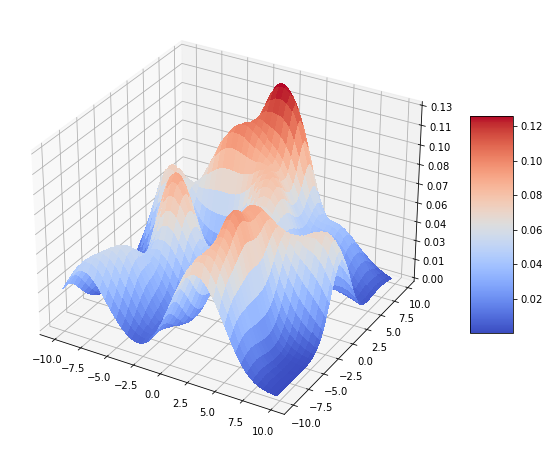

In [10]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

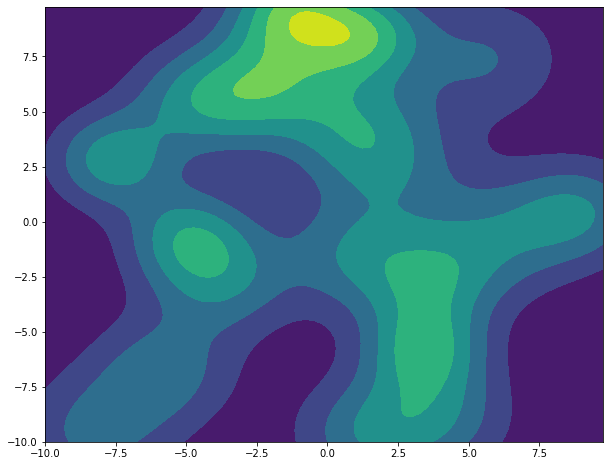

In [33]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(X, Y, Z)

In [116]:
TwoDNode._value_f = lambda state: f(state[0], state[1], means, covs)

initial_n = TwoDNode([0, 0])

# HILL CLIMBING

In [117]:
solution_n = hill_climbing(initial_n)
solution_n

Node: [3, -3]

In [118]:
solution_n.value()

0.08884516085163038

In [119]:
sol_path = solution_n.path()
x = []
y = []
for sp in sol_path:
    x.append(sp.state)
    y.append(sp.value())

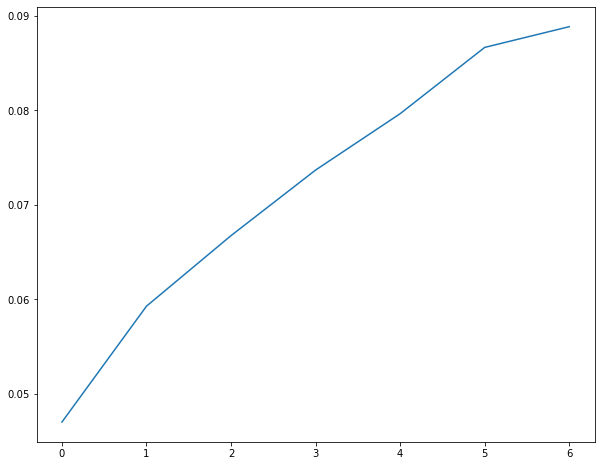

In [120]:
plt.plot(range(len(y)), y)

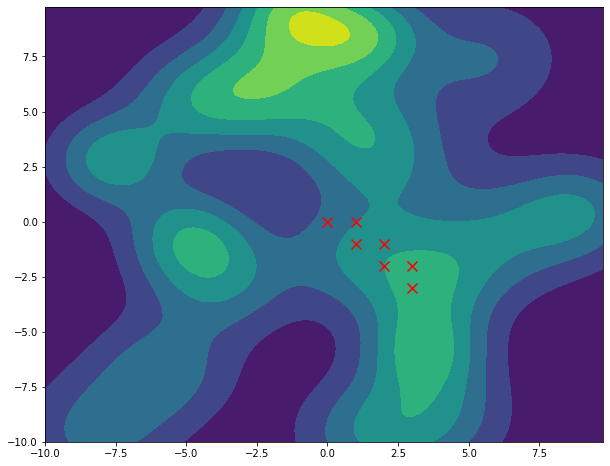

In [121]:
x_a = np.asarray(x)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(X, Y, Z)
ax2.scatter(x_a[:, 0], x_a[:, 1], marker='x', c='r', s=100)

# SIMULATED ANNEALING

In [122]:
def exp_schedule(k, lam):
    """One possible schedule function for simulated annealing"""
    return lambda t: k * np.exp(-lam * t)

In [123]:
def plot_prob(ax, ti, temp_schedule, max_iter, delta_e):
    probs = []
    for t in range(max_iter):
        T = temp_schedule(t)
        p = np.exp(delta_e/T)
        probs.append(p)
    ax.plot(range(len(probs)), probs, label=ti)

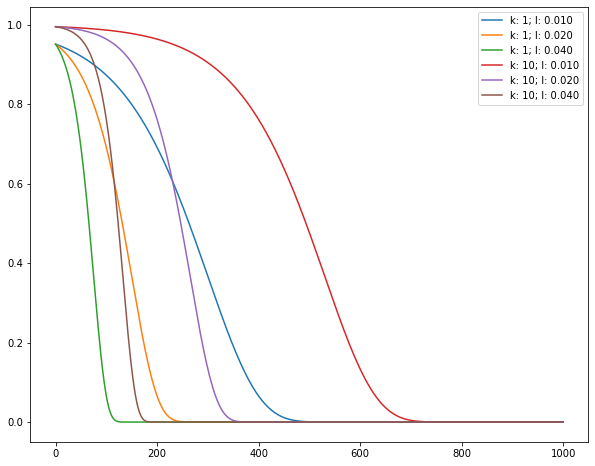

In [124]:
_, ax = plt.subplots()

ks = [1, 10]
ls = [0.01, 0.02, 0.04]

for k in ks:
    for l in ls:
        plot_prob(ax, "k: {:d}; l: {:.3f}".format(k, l), exp_schedule(k=k, lam=l), max_iter=1000, delta_e=-0.05)


# plot_prob(ax, "0.015", exp_schedule(k=200, lam=0.015), max_iter=500, delta_e=-10)
# plot_prob(ax, "0.025", exp_schedule(k=200, lam=0.025), max_iter=500, delta_e=-10)
# plot_prob(ax, "k, 0.025", exp_schedule(k=300, lam=0.025), max_iter=500, delta_e=-10)

ax.legend()

In [125]:
solution_n = simulated_annealing(initial_n, exp_schedule(k=1, lam=0.01), 50, random_state)
solution_n

Node: [2, -1]

In [126]:
solution_n.value()

0.07367219030603099

In [127]:
sol_path = solution_n.path()
x = []
y = []
for sp in sol_path:
    x.append(sp.state)
    y.append(sp.value())

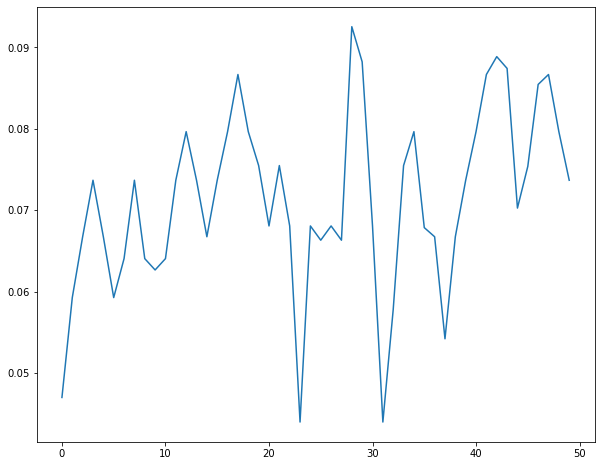

In [128]:
plt.plot(range(len(y)), y)

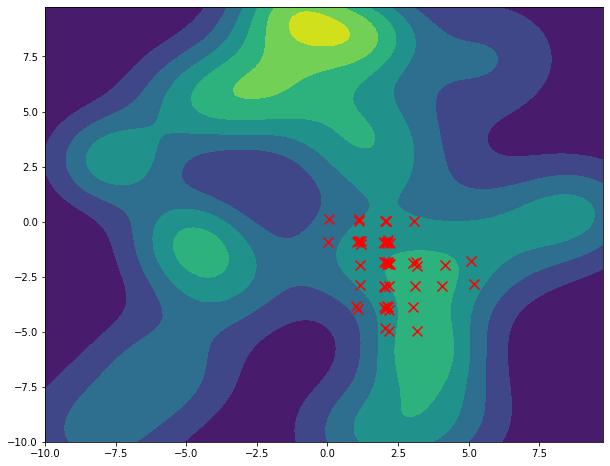

In [129]:
x_a = np.asarray(x)
x_a_r = x_a + random_state.random(size=x_a.shape)/5

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(X, Y, Z)
ax2.scatter(x_a_r[:, 0], x_a_r[:, 1], marker='x', c='r', s=100)